#### Import Libraries

In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# For encoding
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique

# For scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV

# For model development
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor



#### Load Dataset

In [32]:
df = pd.read_csv('/content/sample_data/Smart_Grid.csv')
df.head()

,Timestamp,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
0,2024-01-01 00:00:00,232.483571,5.124673,1.191402,0.399029,0.907766,46.614845,26.399566,0.0,1.055937,0,0,17.842767,64.523353,0.416156,1.233158
1,2024-01-01 00:15:00,229.308678,22.213519,5.093753,1.248030,0.831813,6.907170,18.555011,0.0,-3.910902,1,0,18.753698,49.671940,0.492334,5.247824
2,2024-01-01 00:30:00,233.238443,46.132217,10.759806,2.790464,0.999005,15.477640,12.905025,0.0,-0.197551,0,0,16.719325,48.472769,0.427785,10.580278
3,2024-01-01 00:45:00,237.615149,47.648972,11.322118,1.956965,0.896462,35.746398,28.937129,0.0,2.671921,0,0,15.364564,75.766776,0.487953,11.225946
4,2024-01-01 01:00:00,228.829233,7.410166,1.695663,0.624718,0.870681,27.555038,14.184648,0.0,3.826937,0,0,38.760333,61.384213,0.290078,1.696639


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    50000 non-null  object 
 1   Voltage (V)                  50000 non-null  float64
 2   Current (A)                  50000 non-null  float64
 3   Power Consumption (kW)       50000 non-null  float64
 4   Reactive Power (kVAR)        50000 non-null  float64
 5   Power Factor                 50000 non-null  float64
 6   Solar Power (kW)             50000 non-null  float64
 7   Wind Power (kW)              50000 non-null  float64
 8   Grid Supply (kW)             50000 non-null  float64
 9   Voltage Fluctuation (%)      50000 non-null  float64
 10  Overload Condition           50000 non-null  int64  
 11  Transformer Fault            50000 non-null  int64  
 12  Temperature (°C)             50000 non-null  float64
 13  Humidity (%)    

In [34]:
df.shape

(50000, 16)

In [35]:
df.isnull().sum()

,0
Timestamp,0
Voltage (V),0
Current (A),0
Power Consumption (kW),0
Reactive Power (kVAR),0
Power Factor,0
Solar Power (kW),0
Wind Power (kW),0
Grid Supply (kW),0
Voltage Fluctuation (%),0


In [36]:
df.describe()

,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,229.997896,27.482627,6.320811,1.584137,0.899997,25.075357,15.008312,0.047198,-0.002723,0.099120,0.029200,25.019338,50.092434,0.299095,6.320693
std,5.000849,12.984307,2.990096,0.964876,0.057740,14.434644,8.663070,0.460281,2.884219,0.298826,0.168368,8.657092,17.263387,0.115495,2.997199
min,207.671981,5.001239,1.089178,0.113665,0.800001,0.000115,0.000067,0.000000,-4.999913,0.000000,0.000000,10.000016,20.000423,0.100002,1.043487
25%,226.606874,16.144764,3.706998,0.805235,0.849930,12.597064,7.495573,0.000000,-2.506506,0.000000,0.000000,17.483315,35.271140,0.198925,3.711469
50%,230.008697,27.580058,6.340475,1.386541,0.900119,25.031922,15.035654,0.000000,-0.009397,0.000000,0.000000,25.052471,49.998822,0.298936,6.328723
75%,233.385302,38.778588,8.914134,2.209433,0.949748,37.527215,22.528948,0.000000,2.493917,0.000000,0.000000,32.541626,65.017934,0.398642,8.910125
max,252.395421,49.999642,12.103199,4.684119,0.999997,49.998963,29.997815,10.766046,4.999946,1.000000,1.000000,39.999949,79.997923,0.499996,12.483253


In [37]:
df.describe(include='object')

,Timestamp
count,50000
unique,50000
top,2025-06-04 15:45:00
freq,1


#### Data Cleaning

In [38]:
# Handle missing values
# df = df.dropna()

# Check duplicates
# df = df.drop_duplicates()

# Ensure correct dtypes
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [39]:
df.dtypes

,0
Timestamp,datetime64[ns]
Voltage (V),float64
Current (A),float64
Power Consumption (kW),float64
Reactive Power (kVAR),float64
Power Factor,float64
Solar Power (kW),float64
Wind Power (kW),float64
Grid Supply (kW),float64
Voltage Fluctuation (%),float64


#### Exploratory Data Analysis (EDA)

Univariate Analysis

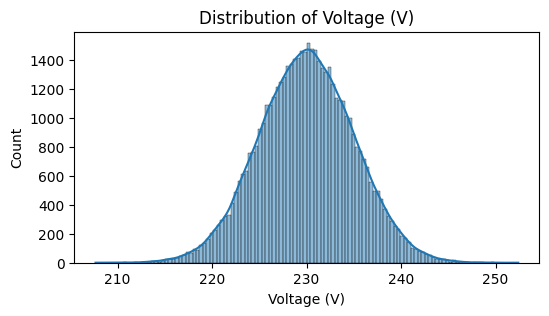

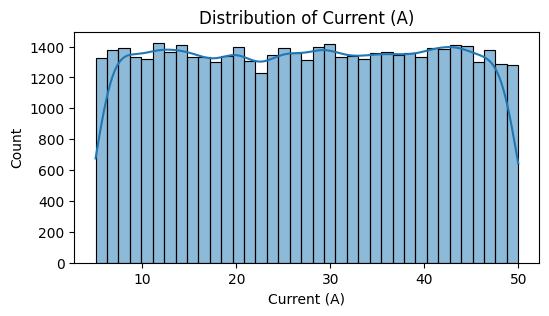

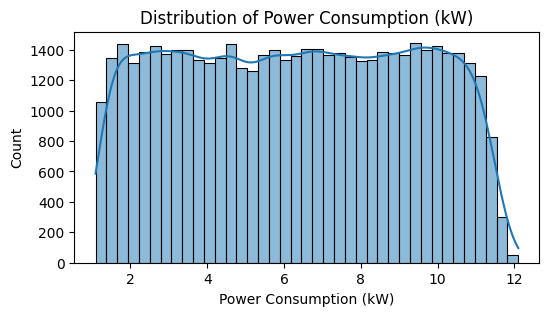

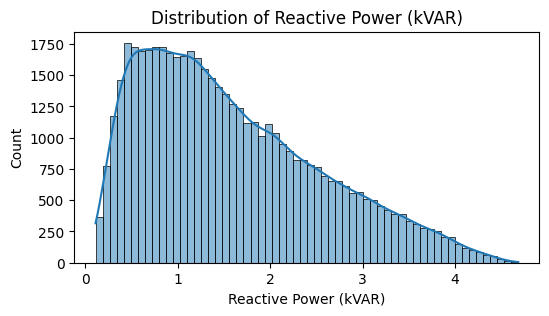

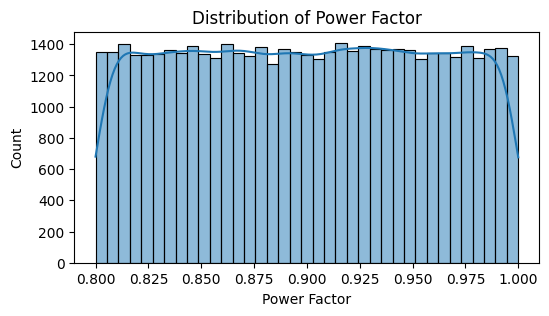

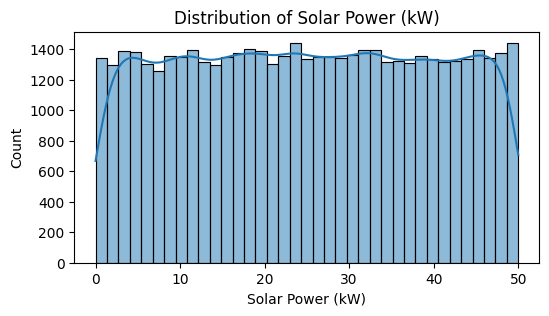

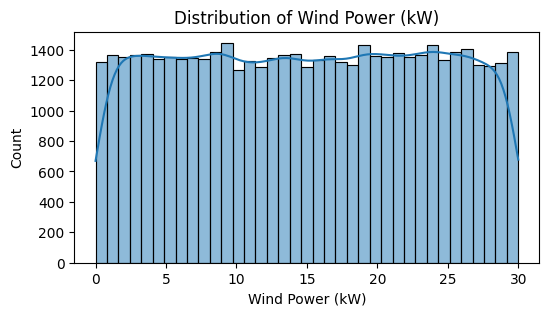

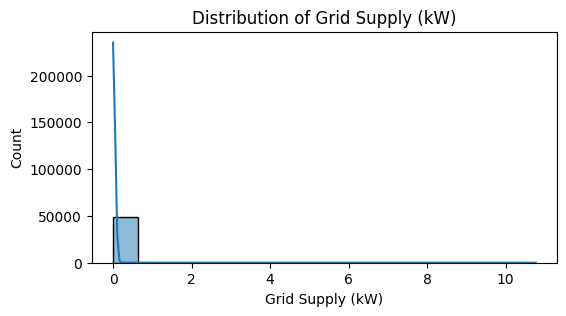

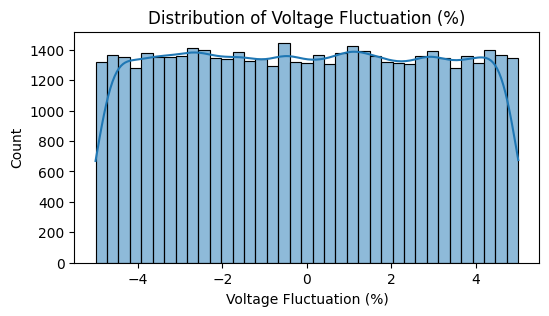

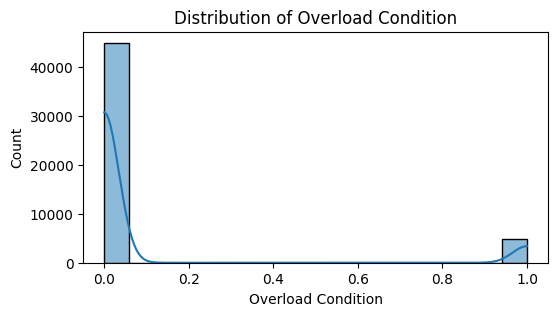

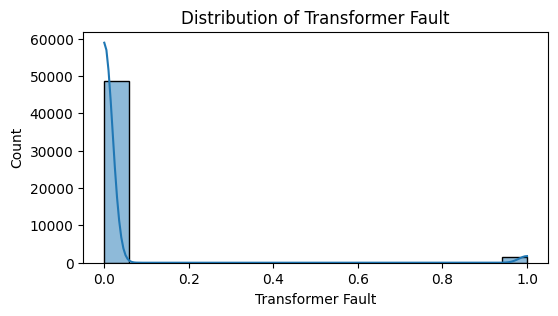

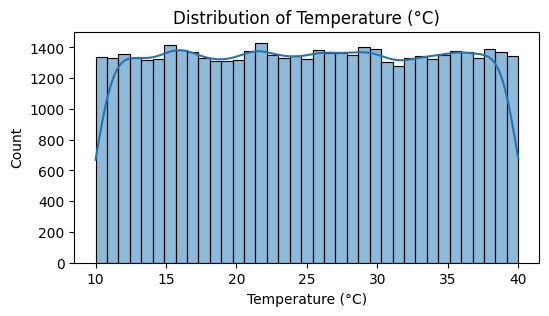

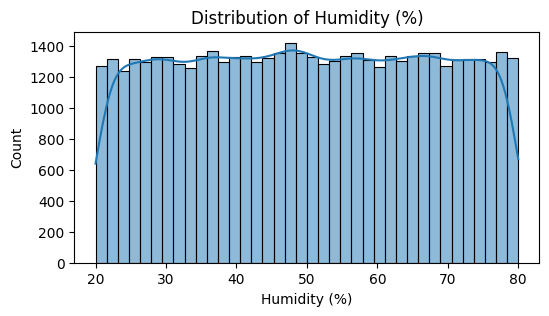

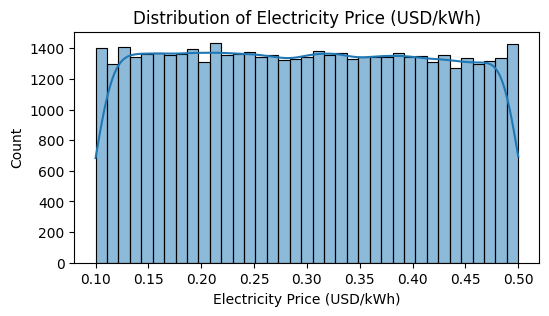

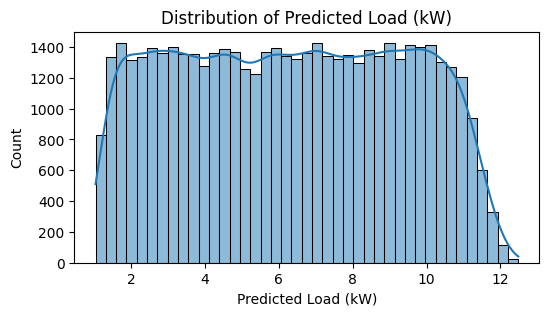

In [40]:
# Distribution plots
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Bivariate Analysis

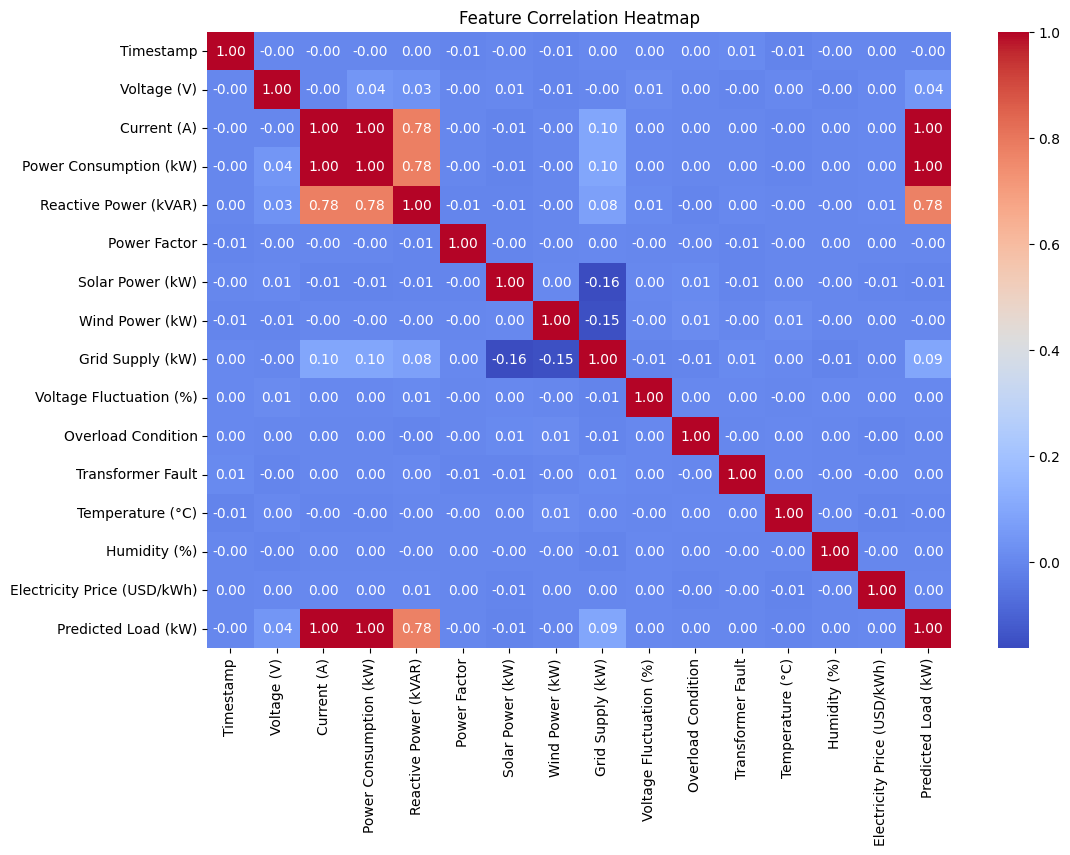

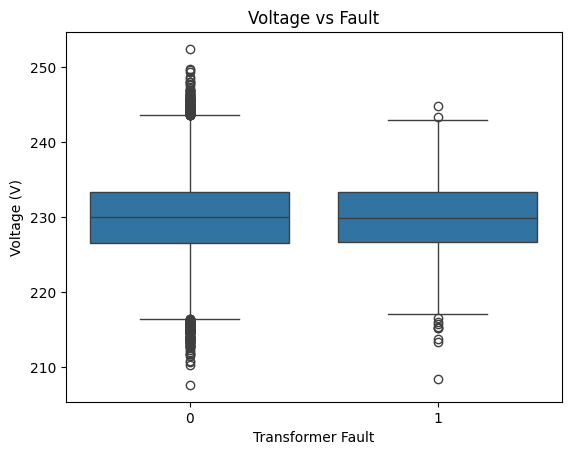

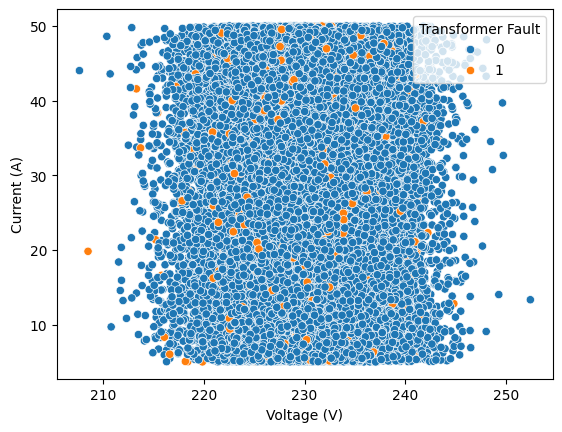

In [41]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt = ".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Fault relation with key features
sns.boxplot(x="Transformer Fault", y="Voltage (V)", data=df)
plt.title("Voltage vs Fault")
plt.show()

# Bivariate - Voltage vs Current
sns.scatterplot(x="Voltage (V)", y="Current (A)", hue="Transformer Fault", data=df)
plt.show()


## Note
The dataset contains features that are largely uncorrelated with each other, which is why nearly every cell in the heatmap is a neutral color near zero.


#### Target Engineering

In [42]:
# Check if the data is imbalanced?

df['Transformer Fault'].value_counts()  # Imabalnced data

,count
Transformer Fault,
0,48540
1,1460


In [51]:
# Regression Target
if "Power_Efficiency" not in df.columns:
    df["Power_Efficiency"] = (df["Power Consumption (kW)"] /
                             (df["Grid Supply (kW)"] + df["Solar Power (kW)"] + df["Wind Power (kW)"] + 1e-6)) * 100

# Classification target
y_class = df["Transformer Fault"]
X_class = df.drop(["Transformer Fault", "Power_Efficiency", "Timestamp"], axis=1)

# Regression target
y_reg = df["Power_Efficiency"]
X_reg = df.drop(["Transformer Fault", "Power_Efficiency", "Timestamp"], axis=1)



#### Encoding & Scaling

In [44]:
# Encode categorical if present
cat_cols = X_class.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    X_class[col] = le.fit_transform(X_class[col])



#### Train-Test Split

In [45]:
# Classification (split before SMOTE to avoid leakage)
X_train_c, X_test_c, y_train_c, y_test_c, idx_train_c, idx_test_c = train_test_split(
    X_class, y_class, df.index, test_size=0.2, random_state=42
)


#### Handle Class Imbalance (Fault Detection)

In [46]:
# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_c_res, y_train_c_res = smote.fit_resample(X_train_c, y_train_c)

In [47]:
print("Before SMOTE:", y_class.value_counts())
print("After SMOTE:", y_train_c_res.value_counts())

Before SMOTE: Transformer Fault
0    48540
1     1460
Name: count, dtype: int64
After SMOTE: Transformer Fault
0    38833
1    38833
Name: count, dtype: int64


In [48]:
# Regression (no resampling needed)
X_train_r, X_test_r, y_train_r, y_test_r, idx_train_r, idx_test_r = train_test_split(
    X_reg, y_reg, df.index, test_size=0.2, random_state=42
)



In [49]:
# Scale regression features
scaler = StandardScaler()
X_train_r = scaler.fit_transform(X_train_r)
X_test_r = scaler.transform(X_test_r)

#### Classification Models

In [52]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss", n_jobs=-1),
    "LightGBM": LGBMClassifier(n_jobs=-1),
    "CatBoost": CatBoostClassifier(verbose=0)
}

for name, model in classifiers.items():
    model.fit(X_train_c_res, y_train_c_res)
    y_pred = model.predict(X_test_c)
    y_proba = model.predict_proba(X_test_c)[:,1]
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test_c, y_pred))
    print("F1-Score:", f1_score(y_test_c, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test_c, y_proba))
    print(classification_report(y_test_c, y_pred))




Logistic Regression
Accuracy: 0.3329
F1-Score: 0.05120182050917366
ROC-AUC: 0.46936853915280874
              precision    recall  f1-score   support

           0       0.97      0.32      0.49      9707
           1       0.03      0.61      0.05       293

    accuracy                           0.33     10000
   macro avg       0.50      0.47      0.27     10000
weighted avg       0.94      0.33      0.47     10000


Decision Tree
Accuracy: 0.8036
F1-Score: 0.051207729468599035
ROC-AUC: 0.5016417904675244
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      9707
           1       0.03      0.18      0.05       293

    accuracy                           0.80     10000
   macro avg       0.50      0.50      0.47     10000
weighted avg       0.94      0.80      0.87     10000


Random Forest
Accuracy: 0.9183
F1-Score: 0.03084223013048636
ROC-AUC: 0.49838791962873974
              precision    recall  f1-score   support

           0

#### Classification Models with Cross-Validation

In [53]:
from sklearn.model_selection import cross_val_score

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss", n_jobs=-1, use_label_encoder=False),
    "LightGBM": LGBMClassifier(n_jobs=-1),
    "CatBoost": CatBoostClassifier(verbose=0)
}

for name, model in classifiers.items():
    # Cross-validation on training set
    cv_scores = cross_val_score(
        model, X_train_c_res, y_train_c_res,
        cv=5, scoring="f1"
    )

    # Train final model on the full training set
    model.fit(X_train_c_res, y_train_c_res)
    y_pred = model.predict(X_test_c)
    y_proba = model.predict_proba(X_test_c)[:, 1]

    # Results
    print("="*60)
    print(f"{name}")
    print(f"CV F1-score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print("Test Accuracy:", accuracy_score(y_test_c, y_pred))
    print("Test F1-Score:", f1_score(y_test_c, y_pred))
    print("Test ROC-AUC:", roc_auc_score(y_test_c, y_proba))
    print("Classification Report:\n", classification_report(y_test_c, y_pred))


Logistic Regression
CV F1-score: 0.6497 (+/- 0.0037)
Test Accuracy: 0.3329
Test F1-Score: 0.05120182050917366
Test ROC-AUC: 0.46936853915280874
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.32      0.49      9707
           1       0.03      0.61      0.05       293

    accuracy                           0.33     10000
   macro avg       0.50      0.47      0.27     10000
weighted avg       0.94      0.33      0.47     10000

Decision Tree
CV F1-score: 0.8549 (+/- 0.0028)
Test Accuracy: 0.8026
Test F1-Score: 0.0472972972972973
Test ROC-AUC: 0.4945067965800691
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      9707
           1       0.03      0.17      0.05       293

    accuracy                           0.80     10000
   macro avg       0.50      0.49      0.47     10000
weighted avg       0.94      0.80      0.87     10000

Random Forest
CV F

#### Regression Models

In [54]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

for name, model in regressors.items():
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)
    # rmse = mean_squared_error(y_test_r, y_pred)
    mae = mean_absolute_error(y_test_r, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_r, y_pred))
    r2 = r2_score(y_test_r, y_pred)
    print(f"\n{name}")
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2:", r2)




Linear Regression
RMSE: 8.970199879089197
MAE: 5.893688239633001
R2: 0.7575523660022845

Decision Tree
RMSE: 1.8869208987210588
MAE: 0.9408665393721345
R2: 0.98927194234854

Random Forest
RMSE: 0.9806461884972858
MAE: 0.36337513846731057
R2: 0.9971024002269554

Gradient Boosting
RMSE: 2.3350345191549904
MAE: 1.1474624910976816
R2: 0.9835714089154453

AdaBoost
RMSE: 9.220938248729366
MAE: 8.490574863896107
R2: 0.7438089599267391

XGBoost
RMSE: 1.0784068373150248
MAE: 0.6003954264409552
R2: 0.9964958799623795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3282
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 14
[LightGBM] [Info] Start training from score 20.666821

LightGBM
RMSE: 0.9494183684687598
MAE: 0.5118732484258011
R2: 0.9972840049808516

CatBoost
RMSE: 0.5689608515210669
MAE: 0.2969774580470832
R2

#### Regression Models with Cross-Validation

In [55]:
from sklearn.model_selection import cross_val_score

regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "CatBoost": CatBoostRegressor(verbose=0)
}

for name, model in regressors.items():
    # Cross-validation on training set
    cv_scores = cross_val_score(
        model, X_train_r, y_train_r,
        cv=5, scoring="r2"
    )

    # Train final model on full training set
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)

    # Evaluation on test set
    mae = mean_absolute_error(y_test_r, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_r, y_pred))
    r2 = r2_score(y_test_r, y_pred)

    print("="*60)
    print(f"{name}")
    print(f"CV R2: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
    print("Test RMSE:", rmse)
    print("Test MAE:", mae)
    print("Test R2:", r2)


Linear Regression
CV R2: 0.7606 (+/- 0.0055)
Test RMSE: 8.970199879089197
Test MAE: 5.893688239633001
Test R2: 0.7575523660022845
Decision Tree
CV R2: 0.9864 (+/- 0.0008)
Test RMSE: 1.9304739166736193
Test MAE: 0.9476624629041814
Test R2: 0.988770986970699
Random Forest
CV R2: 0.9966 (+/- 0.0005)
Test RMSE: 0.9673475871955641
Test MAE: 0.3626064128940605
Test R2: 0.9971804563973987
Gradient Boosting
CV R2: 0.9830 (+/- 0.0008)
Test RMSE: 2.335074257710461
Test MAE: 1.147556096641269
Test R2: 0.9835708497339616
AdaBoost
CV R2: 0.7363 (+/- 0.0244)
Test RMSE: 9.22486003987088
Test MAE: 8.39098103956866
Test R2: 0.7435909904779447
XGBoost
CV R2: 0.9960 (+/- 0.0002)
Test RMSE: 1.0784068373150248
Test MAE: 0.6003954264409552
Test R2: 0.9964958799623795
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004471 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3237
[LightGBM] [Info] Number of data points in the t

#### Save Predictions

In [56]:
# Final Combined Predictions

# Pick best classifier (example: Random Forest)
best_clf = RandomForestClassifier()
best_clf.fit(X_train_c_res, y_train_c_res)

# Pick best regressor (example: CatBoost)
best_reg = CatBoostRegressor(verbose=0)
best_reg.fit(X_train_r, y_train_r)

fault_preds = best_clf.predict(X_test_c)  # classification
eff_preds = best_reg.predict(X_test_r)   # regression

final_preds = pd.DataFrame({
    "Timestamp": df.loc[idx_test_c, "Timestamp"].values,
    "Fault_Prediction": fault_preds,
    "Predicted_Power_Efficiency": eff_preds
})

final_preds.to_csv("smart_grid_predictions.csv", index=False)
print("\nFinal Combined Predictions")
print(final_preds.head())


Final Combined Predictions
            Timestamp  Fault_Prediction  Predicted_Power_Efficiency
0 2024-12-15 12:15:00                 0                   20.008600
1 2024-04-08 04:45:00                 0                   15.508804
2 2024-01-03 01:45:00                 0                   23.987459
3 2024-05-09 15:45:00                 0                   32.503925
4 2025-02-15 08:15:00                 0                    3.236738
